       name   datetime  temp  feelslike  humidity  precip  precipprob  \
0  Istanbul 2024-01-01  11.8       11.8     82.88     0.0           0   
1  Istanbul 2024-01-01  11.8       11.8     82.88     0.0           0   
2  Istanbul 2024-01-01  11.8       11.8     82.88     0.0           0   
3  Istanbul 2024-01-01  11.8       11.8     82.88     0.0           0   
4  Istanbul 2024-01-01  11.8       11.8     82.88     0.0           0   

  preciptype  windspeed  visibility  \
0        NaN        3.0         7.2   
1        NaN        3.0         7.2   
2        NaN        3.0         7.2   
3        NaN        3.0         7.2   
4        NaN        3.0         7.2   

                                         stations  _id  DATE_TIME  \
0  D8508,LTBA,17063099999,17064099999,17060099999    1 2024-01-01   
1  D8508,LTBA,17063099999,17064099999,17060099999    2 2024-01-01   
2  D8508,LTBA,17063099999,17064099999,17060099999    3 2024-01-01   
3  D8508,LTBA,17063099999,17064099999,17060099999 

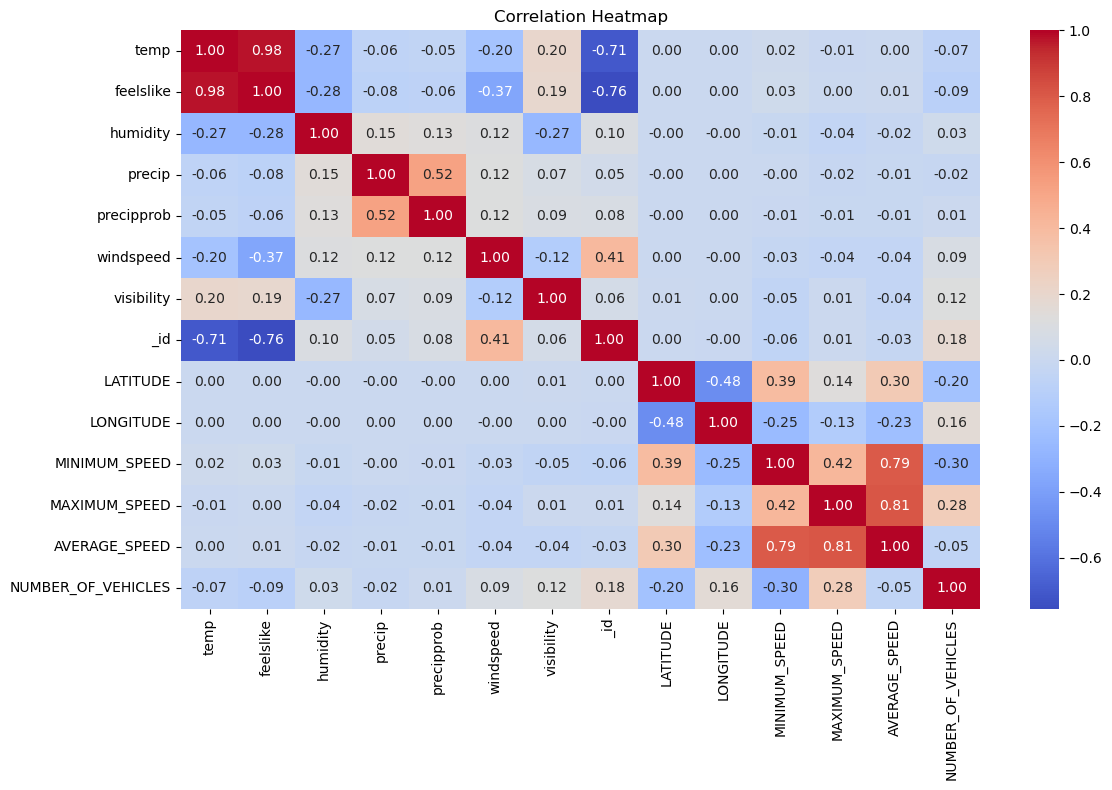

MIN_SPEED < 20: 556659
MAX_SPEED > 120: 267314
WIND_SPEED > 80: 0
PRECIP > 100: 39811


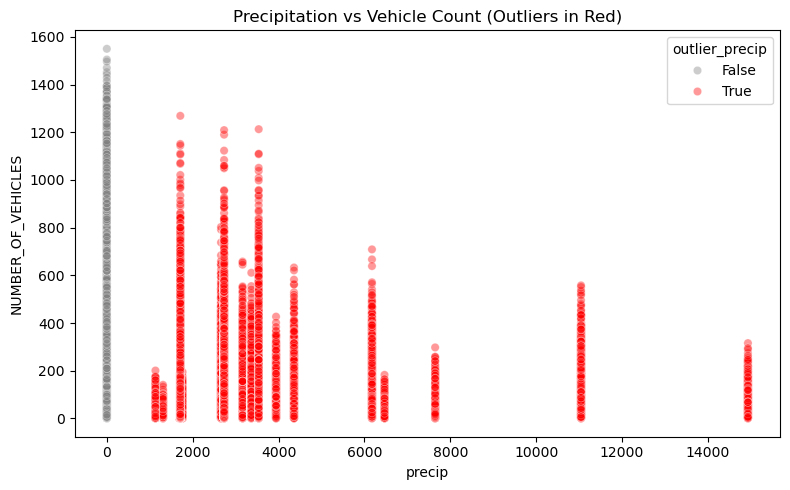

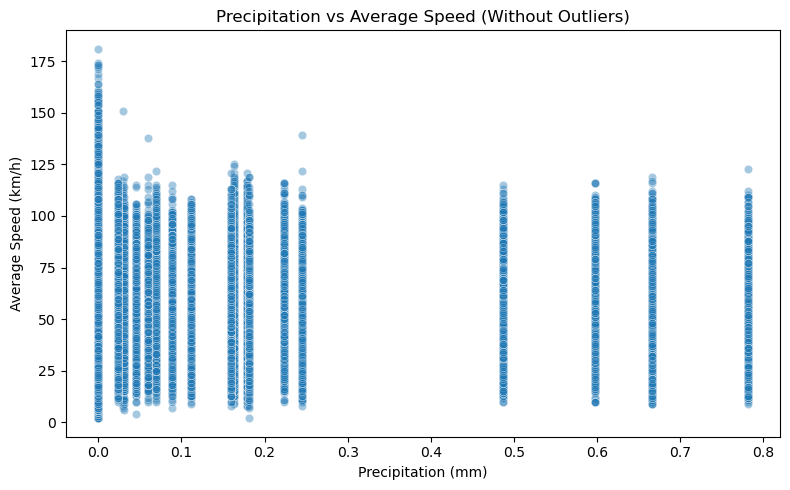

Pearson Correlation Coefficient: -0.0111
P-Value: 0.0000
Result: The null hypothesis is rejected. There is a statistically significant relationship between precipitation and average speed.


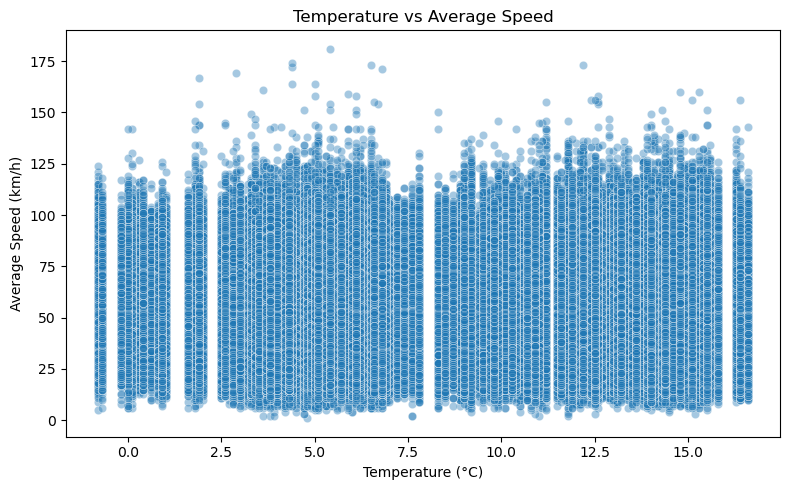

Pearson Correlation (temp vs avg_speed): 0.0018
P-Value: 0.0714
Result: The null hypothesis cannot be rejected. There is no statistically significant relationship between temperature and average speed.


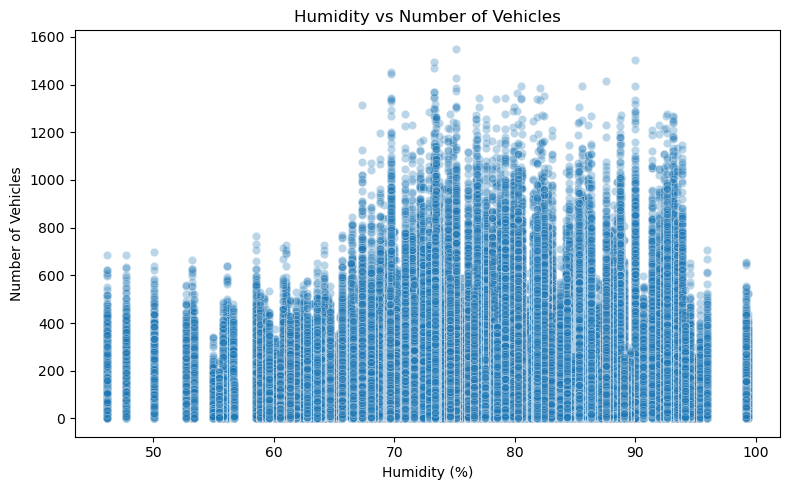

Pearson Correlation (humidity vs number_of_vehicles): 0.0267
P-Value: 0.0000
Result: The null hypothesis is rejected. There is a statistically significant relationship between humidity and number of vehicles.


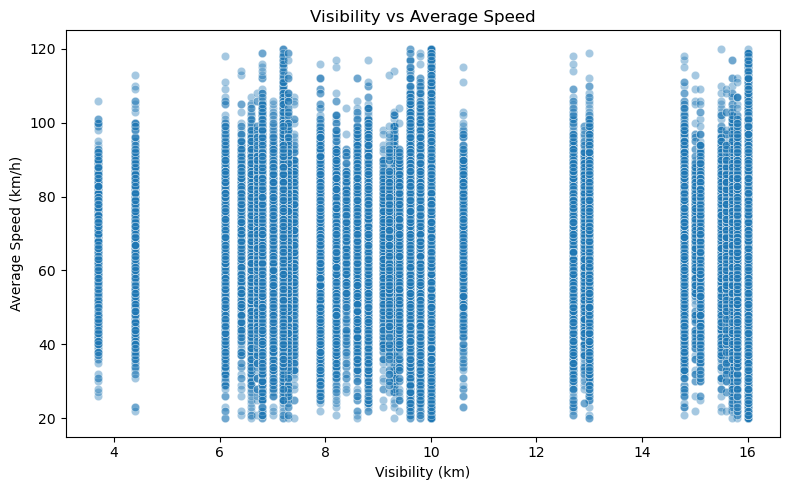

Pearson Correlation Coefficient: 0.0217
P-Value: 0.0000
Result: The null hypothesis is rejected. There is a statistically significant relationship between visibility and average speed.


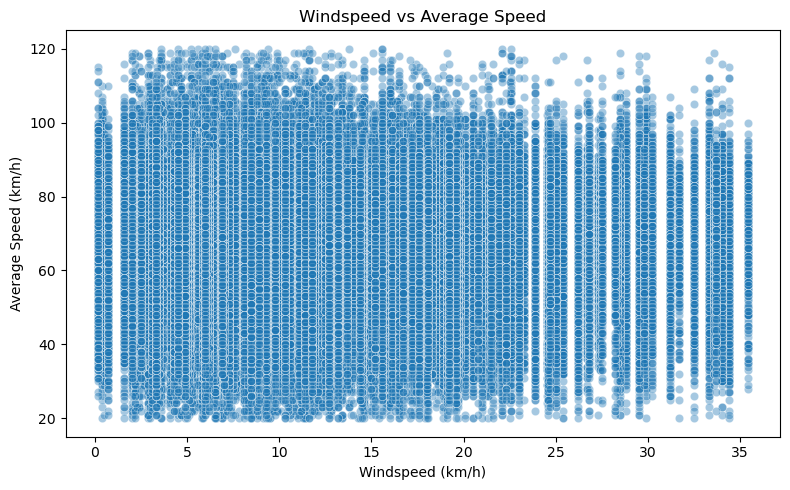

Pearson Correlation Coefficient: -0.0225
P-Value: 0.0000
Result: The null hypothesis is rejected. There is a statistically significant relationship between windspeed and average speed.


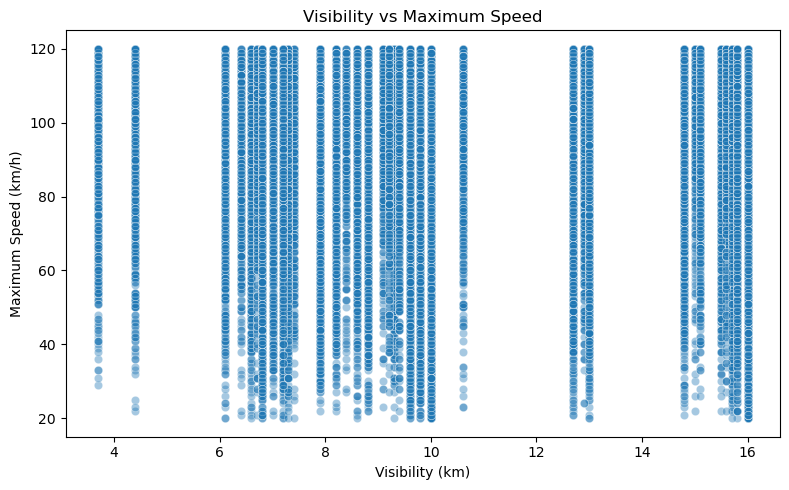

Pearson Correlation (visibility vs max_speed): 0.0479
P-Value: 0.0000
Result: The null hypothesis is rejected. There is a statistically significant relationship between visibility and maximum speed.


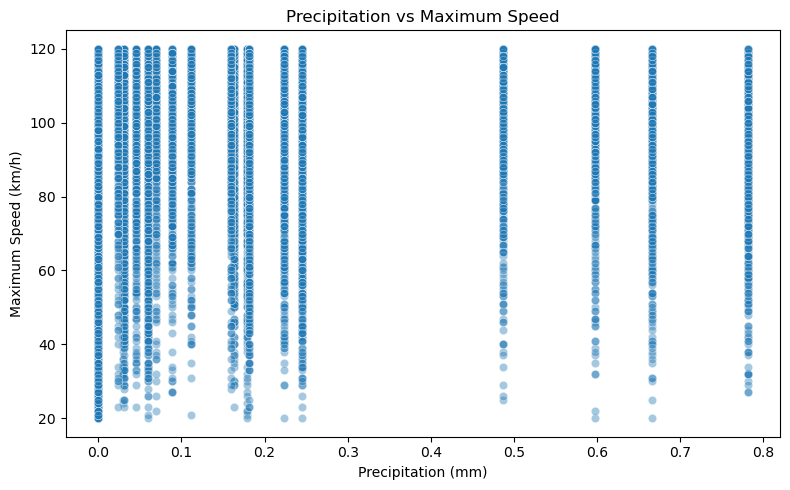

Pearson Correlation (precip vs max_speed): 0.0061
P-Value: 0.0052
Result: The null hypothesis is rejected. There is a statistically significant relationship between precipitation and maximum speed.


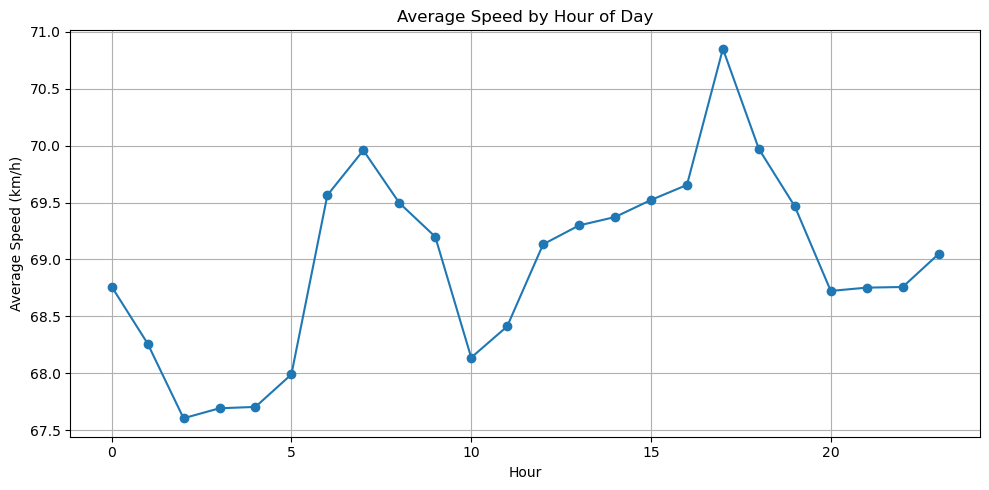

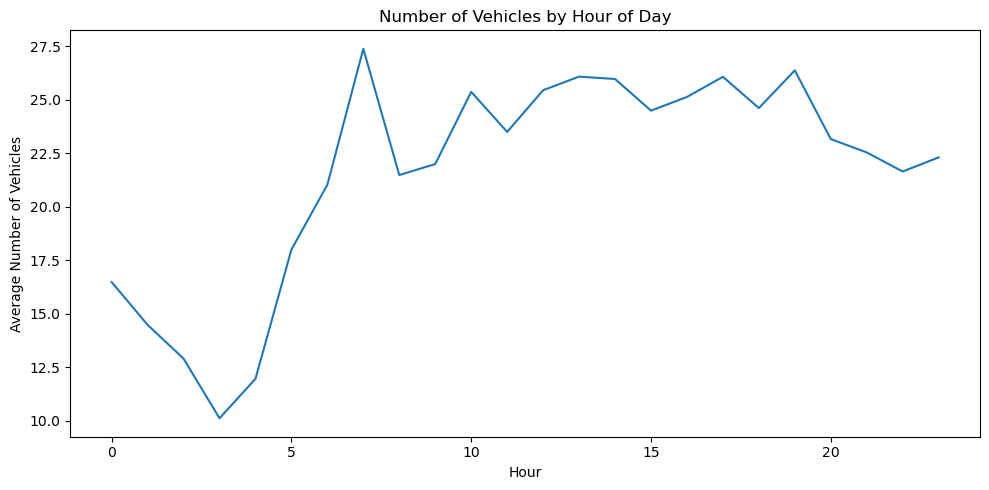

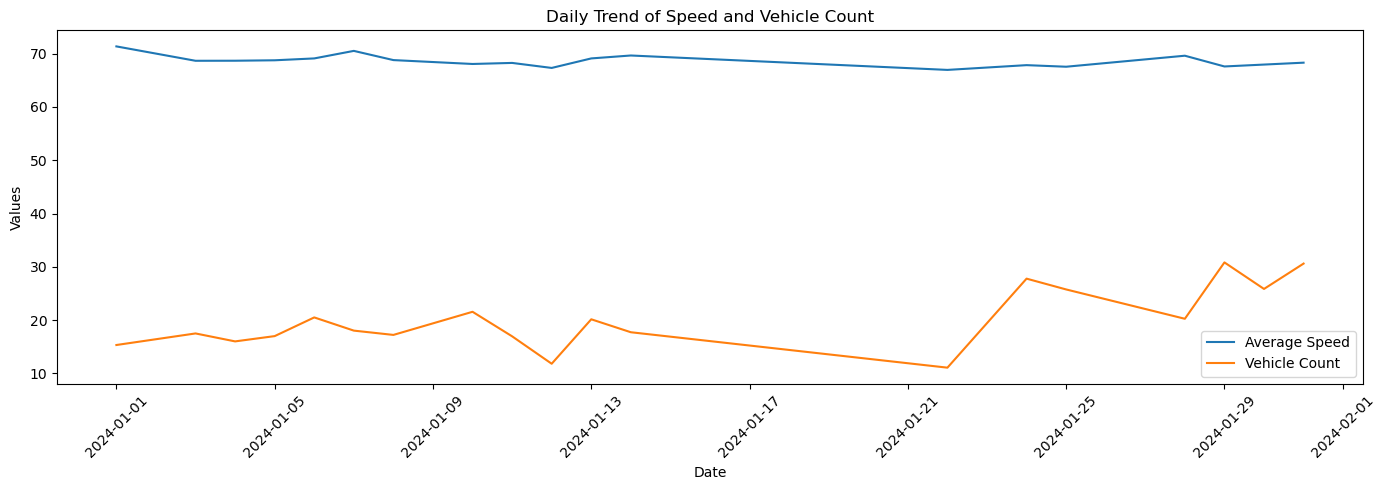

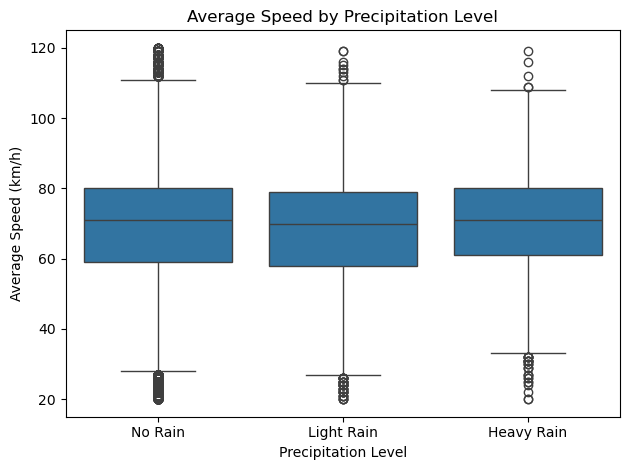

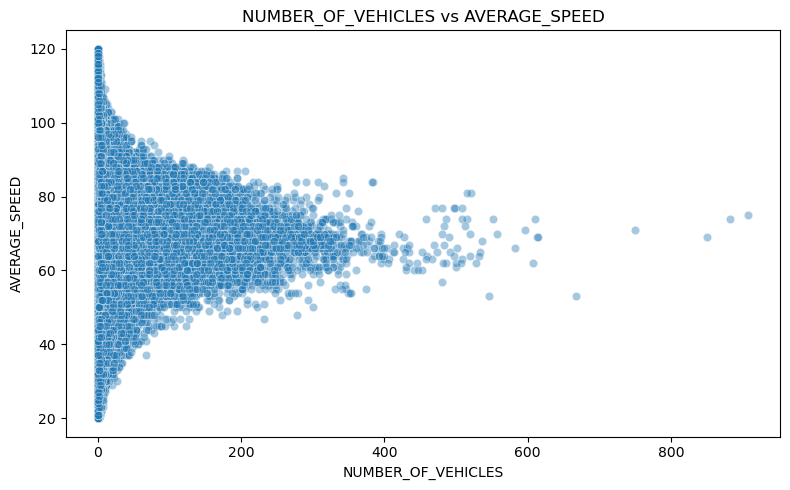

NUMBER_OF_VEHICLES - AVERAGE_SPEED Corr: 0.0537, P-Value: 0.0000


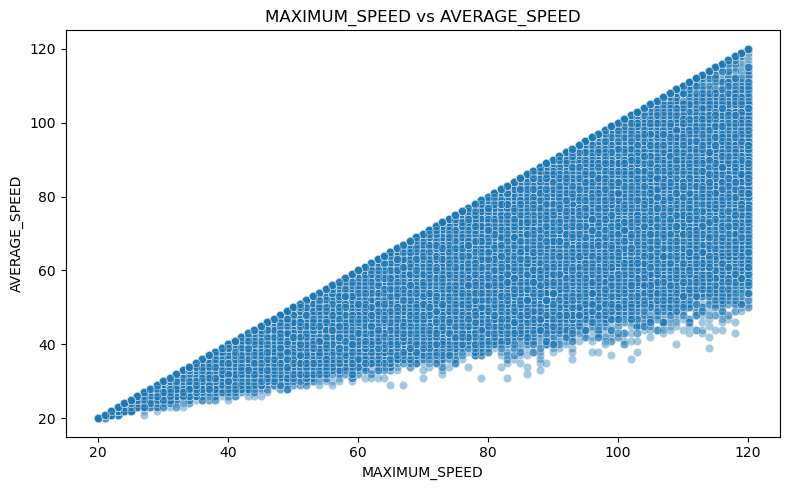

MAXIMUM_SPEED - AVERAGE_SPEED Corr: 0.7828, P-Value: 0.0000


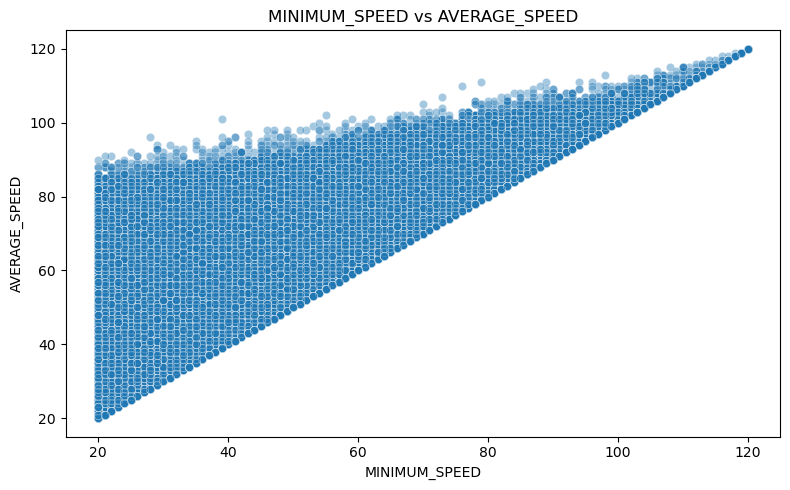

MINIMUM_SPEED - AVERAGE_SPEED Corr: 0.7369, P-Value: 0.0000

--- Tahmin Sonuçları (25-31 Ocak) ---
         date     Actual  Predicted
14 2024-01-25  67.547088  67.741946
15 2024-01-28  69.614064  69.953798
16 2024-01-29  67.597055  67.445561
17 2024-01-30  67.952386  68.041967
18 2024-01-31  68.308059  68.573778

Performans Metrikleri:
R² skoru: 0.9109
RMSE: 0.23
MAE: 0.21


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


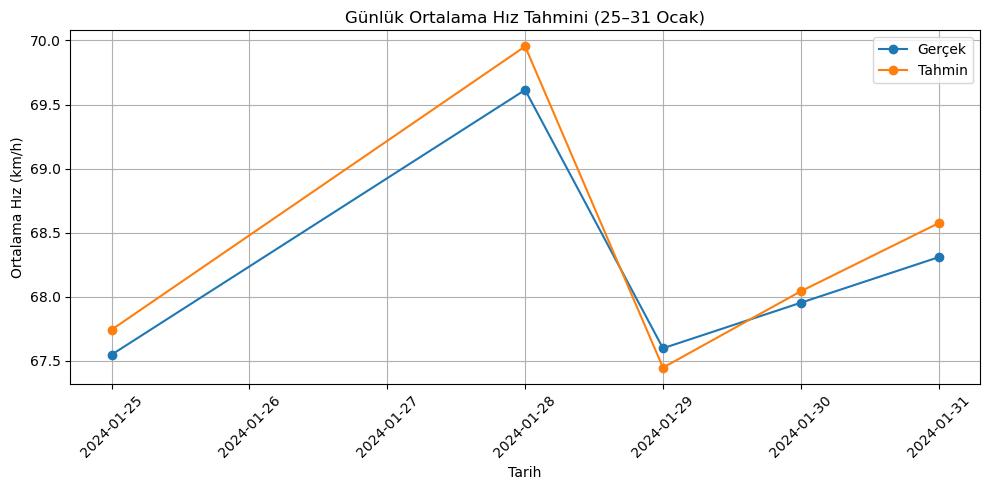

In [9]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun May 18 16:23:04 2025

@author: eceakkozak
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Read files
hava_df = pd.read_excel("2024_ocak_ist_hava.xlsx")
trafik_df = pd.read_excel("2024_ocak_trafik_yogunlugu.xlsx")

# 2. Convert to datetime
hava_df["datetime"] = pd.to_datetime(hava_df["datetime"])
trafik_df["datetime"] = pd.to_datetime(trafik_df["DATE_TIME"])

# 3. Merge datasets
df = pd.merge(hava_df, trafik_df, on="datetime", how="inner")

# 4. Info
print(df.head())
print("Weather data rows:", len(hava_df))
print("Traffic data rows:", len(trafik_df))
print("Merged data rows:", len(df))

# 5. Descriptive stats
numeric_df = df.select_dtypes(include='number')
print(numeric_df.describe().transpose())

# 6. Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# 7. Outlier tagging
df["outlier_min_speed"] = df["MINIMUM_SPEED"] < 20
df["outlier_max_speed"] = df["MAXIMUM_SPEED"] > 120
df["outlier_windspeed"] = df["windspeed"] > 80
df["outlier_precip"] = df["precip"] > 100

print("MIN_SPEED < 20:", df['outlier_min_speed'].sum())
print("MAX_SPEED > 120:", df['outlier_max_speed'].sum())
print("WIND_SPEED > 80:", df['outlier_windspeed'].sum())
print("PRECIP > 100:", df['outlier_precip'].sum())

# 8. Scatterplot with outliers highlighted
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="precip", y="NUMBER_OF_VEHICLES", hue="outlier_precip", alpha=0.4, palette={True: "red", False: "gray"})
plt.title("Precipitation vs Vehicle Count (Outliers in Red)")
plt.tight_layout()
plt.show()

# 9. Cleaned dataframe (if used later)
df_no_outlier = df[df["outlier_precip"] == False]

# 10. Scatterplot: Precip vs Avg Speed (without outliers)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_no_outlier, x="precip", y="AVERAGE_SPEED", alpha=0.4)
plt.title("Precipitation vs Average Speed (Without Outliers)")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Average Speed (km/h)")
plt.tight_layout()
plt.show()

# 11. Correlation test
corr_coef, p_value = pearsonr(df_no_outlier["precip"], df_no_outlier["AVERAGE_SPEED"])
print(f"Pearson Correlation Coefficient: {corr_coef:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: The null hypothesis is rejected. There is a statistically significant relationship between precipitation and average speed.")
else:
    print("Result: The null hypothesis cannot be rejected. There is no statistically significant relationship between precipitation and average speed.")

#Temperature - Average Speed
# 1. Scatterplot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="temp", y="AVERAGE_SPEED", alpha=0.4)
plt.title("Temperature vs Average Speed")
plt.xlabel("Temperature (°C)")
plt.ylabel("Average Speed (km/h)")
plt.tight_layout()
plt.show()

# 2. Pearson correlation test
corr_temp, p_temp = pearsonr(df["temp"], df["AVERAGE_SPEED"])
print(f"Pearson Correlation (temp vs avg_speed): {corr_temp:.4f}")
print(f"P-Value: {p_temp:.4f}")

if p_temp < 0.05:
    print("Result: The null hypothesis is rejected. There is a statistically significant relationship between temperature and average speed.")
else:
    print("Result: The null hypothesis cannot be rejected. There is no statistically significant relationship between temperature and average speed.")

#Humadity - Number of Vehicles
# Scatterplot: Humidity vs Number of Vehicles
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="humidity", y="NUMBER_OF_VEHICLES", alpha=0.3)
plt.title("Humidity vs Number of Vehicles")
plt.xlabel("Humidity (%)")
plt.ylabel("Number of Vehicles")
plt.tight_layout()
plt.show()

# Pearson Correlation Test
corr_humidity, pval_humidity = pearsonr(df["humidity"], df["NUMBER_OF_VEHICLES"])
print(f"Pearson Correlation (humidity vs number_of_vehicles): {corr_humidity:.4f}")
print(f"P-Value: {pval_humidity:.4f}")

if pval_humidity < 0.05:
    print("Result: The null hypothesis is rejected. There is a statistically significant relationship between humidity and number of vehicles.")
else:
    print("Result: The null hypothesis cannot be rejected. There is no statistically significant relationship between humidity and number of vehicles.")


#Visibility - Average Speed
# 1. Read the merged dataset (Excel)
df = pd.read_excel("2024_ocak_hava_trafik_beraber.xlsx")

# 2. Scatterplot - visibility vs average speed
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="visibility", y="AVERAGE_SPEED", alpha=0.4)
plt.title("Visibility vs Average Speed")
plt.xlabel("Visibility (km)")
plt.ylabel("Average Speed (km/h)")
plt.tight_layout()
plt.show()

# 3. Pearson correlation test
corr_coef, p_value = pearsonr(df["visibility"], df["AVERAGE_SPEED"])

# 4. Interpretation
print(f"Pearson Correlation Coefficient: {corr_coef:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: The null hypothesis is rejected. There is a statistically significant relationship between visibility and average speed.")
else:
    print("Result: The null hypothesis cannot be rejected. There is no statistically significant relationship between visibility and average speed.")

#Windspeed - Average Speed
# 1. Veriyi oku
df = pd.read_excel("2024_ocak_hava_trafik_beraber.xlsx") 

# 2. Scatterplot: Windspeed vs Average Speed
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="windspeed", y="AVERAGE_SPEED", alpha=0.4)
plt.title("Windspeed vs Average Speed")
plt.xlabel("Windspeed (km/h)")
plt.ylabel("Average Speed (km/h)")
plt.tight_layout()
plt.show()

# 3. Pearson Correlation Test
corr_coef, p_value = pearsonr(df["windspeed"], df["AVERAGE_SPEED"])
print(f"Pearson Correlation Coefficient: {corr_coef:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: The null hypothesis is rejected. There is a statistically significant relationship between windspeed and average speed.")
else:
    print("Result: The null hypothesis cannot be rejected. There is no statistically significant relationship between windspeed and average speed.")

#Visibility - Maximum Speed
# Scatterplot: Visibility vs Maximum Speed
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="visibility", y="MAXIMUM_SPEED", alpha=0.4)
plt.title("Visibility vs Maximum Speed")
plt.xlabel("Visibility (km)")
plt.ylabel("Maximum Speed (km/h)")
plt.tight_layout()
plt.show()

# Pearson correlation test
corr_coef, p_value = pearsonr(df["visibility"], df["MAXIMUM_SPEED"])
print(f"Pearson Correlation (visibility vs max_speed): {corr_coef:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: The null hypothesis is rejected. There is a statistically significant relationship between visibility and maximum speed.")
else:
    print("Result: The null hypothesis cannot be rejected. There is no statistically significant relationship between visibility and maximum speed.")

#Precipitation - Maximum Speed
# Scatterplot: Precipitation vs Maximum Speed
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="precip", y="MAXIMUM_SPEED", alpha=0.4)
plt.title("Precipitation vs Maximum Speed")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Maximum Speed (km/h)")
plt.tight_layout()
plt.show()

# Pearson correlation test
corr_coef, p_value = pearsonr(df["precip"], df["MAXIMUM_SPEED"])
print(f"Pearson Correlation (precip vs max_speed): {corr_coef:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: The null hypothesis is rejected. There is a statistically significant relationship between precipitation and maximum speed.")
else:
    print("Result: The null hypothesis cannot be rejected. There is no statistically significant relationship between precipitation and maximum speed.")


###### Scatterplotları ketagorik olarak inceleme kısmını yapamadım

#SPEED - TIME daily
df["hour"] = df["datetime"].dt.hour
hourly_avg = df.groupby("hour")["AVERAGE_SPEED"].mean()

plt.figure(figsize=(10,5))
hourly_avg.plot(marker="o")
plt.title("Average Speed by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average Speed (km/h)")
plt.grid(True)
plt.tight_layout()
plt.show()


#NUMBER OF VEHIC - günlük saatlik
df["hour"] = df["datetime"].dt.hour
hourly_vehicle = df.groupby("hour")["NUMBER_OF_VEHICLES"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=hourly_vehicle, x="hour", y="NUMBER_OF_VEHICLES")
plt.title("Number of Vehicles by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average Number of Vehicles")
plt.tight_layout()
plt.show()


#GÜNLÜK ORT HIZ - NUMBER OF VEHICLES
df["date"] = df["datetime"].dt.date
daily_avg = df.groupby("date")[["AVERAGE_SPEED", "NUMBER_OF_VEHICLES"]].mean().reset_index()

plt.figure(figsize=(14,5))
sns.lineplot(data=daily_avg, x="date", y="AVERAGE_SPEED", label="Average Speed")
sns.lineplot(data=daily_avg, x="date", y="NUMBER_OF_VEHICLES", label="Vehicle Count")
plt.title("Daily Trend of Speed and Vehicle Count")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#LOW MEDIUM HIGH RAIN - AVERAGE SPEED
df["precip_level"] = pd.cut(df["precip"], 
                            bins=[-0.1, 0.0, 0.3, df["precip"].max()], 
                            labels=["No Rain", "Light Rain", "Heavy Rain"])

sns.boxplot(data=df, x="precip_level", y="AVERAGE_SPEED")
plt.title("Average Speed by Precipitation Level")
plt.xlabel("Precipitation Level")
plt.ylabel("Average Speed (km/h)")
plt.tight_layout()
plt.show()

# Trafik değişkenleriyle avg speed ilişkisi
for col in ["NUMBER_OF_VEHICLES", "MAXIMUM_SPEED", "MINIMUM_SPEED"]:
    plt.figure(figsize=(8,5))
    sns.scatterplot(data=df, x=col, y="AVERAGE_SPEED", alpha=0.4)
    plt.title(f"{col} vs AVERAGE_SPEED")
    plt.tight_layout()
    plt.show()

    corr, pval = pearsonr(df[col], df["AVERAGE_SPEED"])
    print(f"{col} - AVERAGE_SPEED Corr: {corr:.4f}, P-Value: {pval:.4f}")



# Etkileşim terimleri
df["precip_x_vehicles"] = df["precip"] * df["NUMBER_OF_VEHICLES"]
df["visibility_x_maxspeed"] = df["visibility"] * df["MAXIMUM_SPEED"]


##MACHINE LEARNING İÇİN TARGET'IM AVERAGE SPEED    


# 1. 'datetime' sütunundan günlük tarih bilgisi oluştur
df["date"] = pd.to_datetime(df["datetime"].dt.date)

# 2. Etkileşimli değişkenleri oluştur (saatlik veride)
df["precip_x_vehicles"] = df["precip"] * df["NUMBER_OF_VEHICLES"]
df["visibility_x_maxspeed"] = df["visibility"] * df["MAXIMUM_SPEED"]

# 3. Günlük ortalamaları alınacak değişkenler
daily_features = [
    "AVERAGE_SPEED", "MAXIMUM_SPEED", "MINIMUM_SPEED", "NUMBER_OF_VEHICLES",
    "temp", "humidity", "precip", "windspeed", "visibility",
    "precip_x_vehicles", "visibility_x_maxspeed"
]

# 4. Günlük ortalama veri setini oluştur
daily_df = df.groupby("date")[daily_features].mean().reset_index()

# 5. 'date' sütununu datetime tipine çevir (dt özellikleri için zorunlu)
daily_df["date"] = pd.to_datetime(daily_df["date"])

# 6. Zaman temelli yeni özellikleri oluştur
daily_df["day_of_week"] = daily_df["date"].dt.dayofweek  # Pazartesi=0, Pazar=6
daily_df["is_weekend"] = (daily_df["day_of_week"] >= 5).astype(int)

# 7. Hedef ve bağımsız değişkenleri belirle
target_col = "AVERAGE_SPEED"
feature_cols = [
    "MAXIMUM_SPEED", "MINIMUM_SPEED", "NUMBER_OF_VEHICLES",
    "temp", "humidity", "precip", "windspeed", "visibility",
    "precip_x_vehicles", "visibility_x_maxspeed",
    "day_of_week", "is_weekend"
]

# 8. İlk 24 günü eğitim, son 7 günü test seti olarak ayır
train_df = daily_df[daily_df["date"] < "2024-01-25"]
test_df = daily_df[daily_df["date"] >= "2024-01-25"]

X_train = train_df[feature_cols]
y_train = train_df[target_col]
X_test = test_df[feature_cols]
y_test = test_df[target_col]

# 9. Modeli oluştur ve eğit
model = LinearRegression()
model.fit(X_train, y_train)

# 10. Test verisinde tahmin yap
y_pred = model.predict(X_test)

# 11. Gerçek vs tahmin tabloyu oluştur
results_df = test_df[["date"]].copy()
results_df["Actual"] = y_test.values
results_df["Predicted"] = y_pred

# 12. Performans metriklerini hesapla
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Tahmin Sonuçları (25-31 Ocak) ---")
print(results_df)
print("\nPerformans Metrikleri:")
print(f"R² skoru: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# 13. Tahminleri grafikle karşılaştır
plt.figure(figsize=(10, 5))
plt.plot(results_df["date"], results_df["Actual"], label="Gerçek", marker="o")
plt.plot(results_df["date"], results_df["Predicted"], label="Tahmin", marker="o")
plt.title("Günlük Ortalama Hız Tahmini (25–31 Ocak)")
plt.xlabel("Tarih")
plt.ylabel("Ortalama Hız (km/h)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
